In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop 'Cabin' column due to high NAN values.

In [ ]:
df.drop(columns='Cabin', inplace= True)

Drop 'Name' column because it's unnecessary

In [ ]:
df.drop(columns='Name', inplace= True)

### Replace NAN values for Age column

In [ ]:
df.Age.fillna(df.Age.median(), inplace= True)

Combine parch and sibsp into Family

In [ ]:
df['Family'] = df.SibSp + df.Parch

In [ ]:
df.drop(columns=['SibSp', 'Parch'], inplace= True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,female,38.0,PC 17599,71.2833,C,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,female,35.0,113803,53.1000,S,1
4,5,0,3,male,35.0,373450,8.0500,S,0


## Handle Outliers

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


<AxesSubplot:xlabel='Age'>

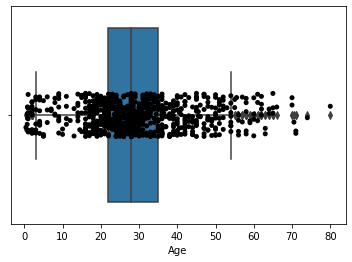

In [ ]:
sns.boxplot(x=df.Age)
sns.stripplot(x=df.Age, color='black')

<AxesSubplot:xlabel='Fare'>

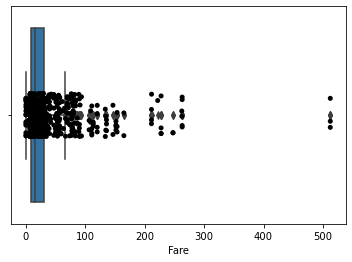

In [ ]:
sns.boxplot(x=df.Fare)
sns.stripplot(x=df.Fare, color='black')

<AxesSubplot:xlabel='Family'>

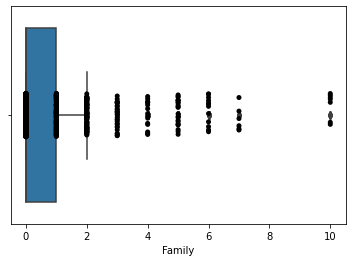

In [ ]:
sns.boxplot(x=df.Family)
sns.stripplot(x=df.Family, color='black')

In [ ]:
from datasist.structdata import detect_outliers

In [ ]:
for c in ['Age', 'Fare', 'Family']:
    outliers_indices = detect_outliers(df, 0, [c])
    median = df[c].median()
    df[c].iloc[outliers_indices] = median

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11284\2694456376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indices] = median


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.476992,17.383622,0.409652
std,257.353842,0.486592,0.836071,9.793559,12.713016,0.686529
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,23.750000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,33.000000,24.150000,1.000000
max,891.000000,1.000000,3.000000,54.000000,65.000000,2.000000


<AxesSubplot:xlabel='Age'>

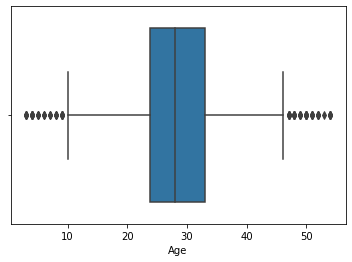

In [ ]:
sns.boxplot(x=df.Age)

<AxesSubplot:xlabel='Fare'>

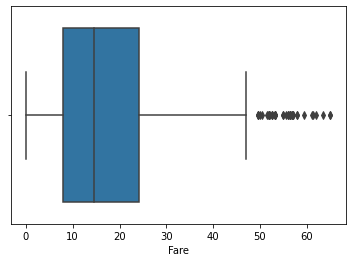

In [ ]:
sns.boxplot(x=df.Fare)

<AxesSubplot:xlabel='Family'>

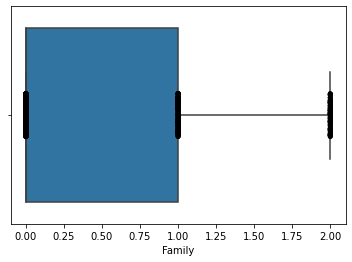

In [ ]:
sns.boxplot(x=df.Family)
sns.stripplot(x=df.Family, color='black')

## Handling Categorical Data (Ordinal)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

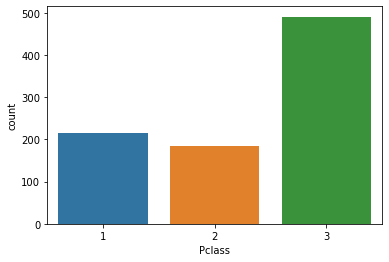

In [ ]:
sns.countplot(x=df['Pclass'])

In [ ]:
encoded_class = {3:1,
            2:2,
            1:3}

In [ ]:
df['Pclass'] = df['Pclass'].map(encoded_class)

In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,1,male,22.0,A/5 21171,7.25,S,1


## Handling Categorical Data (Nominal)

In [ ]:
df = pd.get_dummies(data= df, columns= ['PassengerId', 'Sex', 'Ticket', 'Embarked'], drop_first=True)

## Split data into Train and Test

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Apply Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.score(x_train, y_train)

1.0

In [ ]:
lr.score(x_test, y_test)

0.6983240223463687

## Apply Knn Classifier (where k = 1  provides highest accuracy on test set)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.score(x_train, y_train)

1.0

In [ ]:
knn.score(x_test, y_test)

0.6871508379888268